In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns

ARRAYSIZE = [10,50,100,150,200,250]

np.random.seed(0)
%matplotlib inline
sns.set_theme()

In [2]:
def createArray(size):
    list_py = np.arange(0,size).tolist()
    list_np = np.arange(0,size)
    return list_py, list_np

In [3]:
data = {'Size': ARRAYSIZE}
df = pd.DataFrame(data)

# Cosumo de Memória

Memória ocupada pelos diferentes tipos de arrays

In [4]:
mem_py = []
mem_np = []

for i, val in enumerate(ARRAYSIZE):
    list_py, list_np = createArray(val)
    #print('iteration {}'.format(i))
    #print('list_py size({}) type({})'.format(val, type(list_py)))
    #print('list_np size({}) type({})'.format(val, type(list_np)))
    mem_py.append(sys.getsizeof(list_py))
    mem_np.append(sys.getsizeof(list_np))

df['mem PY'] = mem_py
df['mem NP'] = mem_np


Text(0, 0.5, 'Bytes')

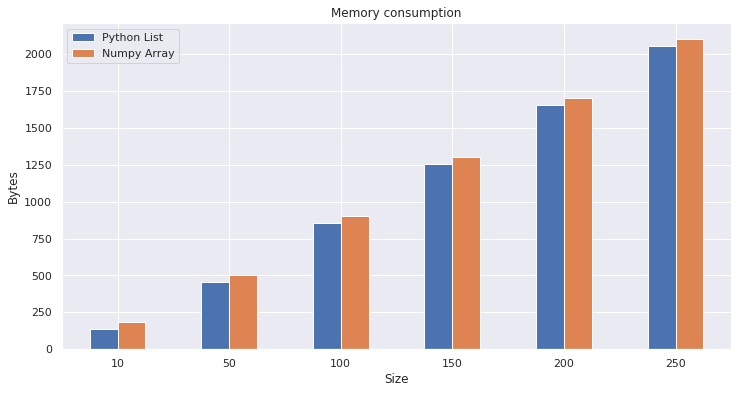

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
ax = df.plot.bar(x='Size', ax=ax)
plt.title('Memory consumption')
plt.legend(labels=['Python List', 'Numpy Array'])
plt.xticks(rotation=0, ha="center")
plt.ylabel('Bytes')

# Adição

Tomada de tempo das operações de adição entre os arrays.

In [6]:
sum_py = []
sum_np = []

for i, val in enumerate(ARRAYSIZE):
    list_py, list_np = createArray(val)
    list_py_a, list_py_b = list_py, list_py
    list_np_a, list_np_b = list_np, list_np

    start = time.process_time()
    sum_list_py = list(map(lambda x, y: x + y, list_py_a, list_py_b))
    end = time.process_time() - start
    sum_py.append(end)

    start = time.process_time()
    sum_list_np = list_np_a + list_np_b
    end = time.process_time() - start
    sum_np.append(end)

df['sum PY'] = sum_py
df['sum NP'] = sum_np

Text(0, 0.5, 'Seconds')

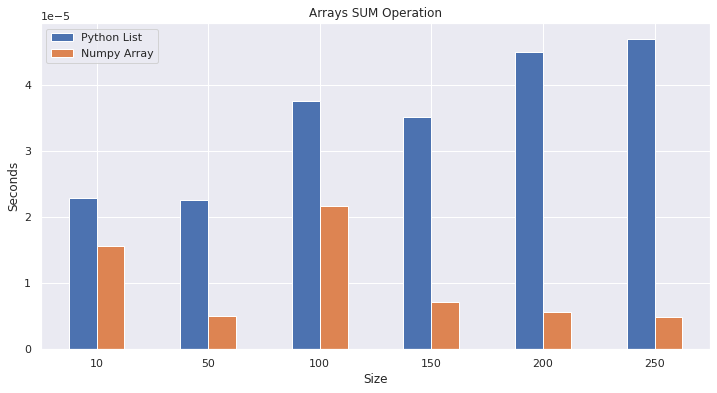

In [7]:
dffig, ax = plt.subplots(figsize=(12,6))
ax = df.plot.bar(x='Size', y=['sum PY', 'sum NP'], ax=ax)
plt.title('Arrays SUM Operation')
plt.legend(labels=['Python List', 'Numpy Array'])
plt.xticks(rotation=0, ha="center")
plt.ylabel('Seconds')

# Multiplicação

Tomada de tempo das operações de multiplicação entre os arrays.

In [8]:
mult_py = []
mult_np = []

for i, val in enumerate(ARRAYSIZE):
    list_py, list_np = createArray(val)
    list_py_a, list_py_b = list_py, list_py
    list_np_a, list_np_b = list_np, list_np

    start = time.process_time()
    mult_list_py = list(map(lambda x, y: x * y, list_py_a, list_py_b))
    end = time.process_time() - start
    mult_py.append(end)

    start = time.process_time()
    mult_list_np = list_np_a * list_np_b
    end = time.process_time() - start
    mult_np.append(end)

df['mult PY'] = mult_py
df['mult NP'] = mult_np

Text(0, 0.5, 'Seconds')

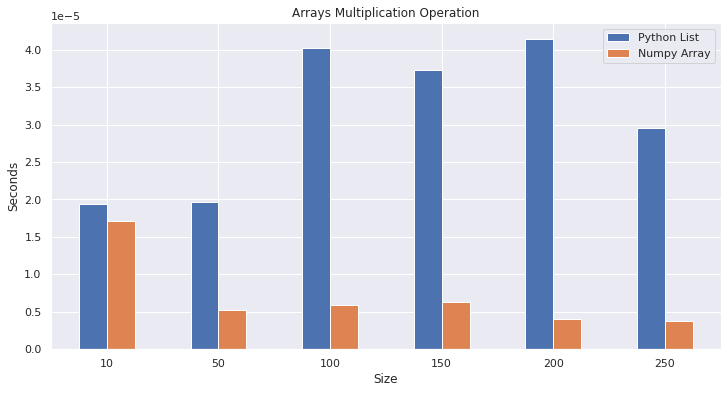

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
ax = df.plot.bar(x='Size', y=['mult PY', 'mult NP'], ax=ax)
plt.title('Arrays Multiplication Operation')
plt.legend(labels=['Python List', 'Numpy Array'])
plt.xticks(rotation=0, ha="center")
plt.ylabel('Seconds')

In [10]:
concat_py = []
concat_np = []

for i, val in enumerate(ARRAYSIZE):
    list_py, list_np = createArray(val)
    list_py_a, list_py_b = list_py, list_py
    list_np_a, list_np_b = list_np, list_np

    start = time.process_time()
    concat_list_py = list_py_a + list_py_b
    end = time.process_time() - start
    concat_py.append(end)

    start = time.process_time()
    concat_list_np = np.concatenate([list_np_a, list_np_b])
    end = time.process_time() - start
    concat_np.append(end)

df['concat PY'] = concat_py
df['concat NP'] = concat_np

Text(0, 0.5, 'Seconds')

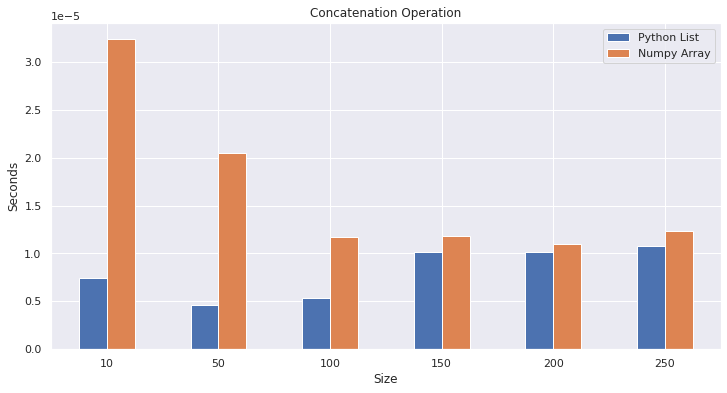

In [11]:
dffig, ax = plt.subplots(figsize=(12,6))
ax = df.plot.bar(x='Size', y=['concat PY', 'concat NP'], ax=ax)
plt.title('Concatenation Operation')
plt.legend(labels=['Python List', 'Numpy Array'])
plt.xticks(rotation=0, ha="center")
plt.ylabel('Seconds')

In [12]:
df

,Size,mem PY,mem NP,sum PY,sum NP,mult PY,mult NP,concat PY,concat NP
0,10,136,184,0.000023,0.000016,0.000019,0.000017,0.000007,0.000032
1,50,456,504,0.000023,0.000005,0.000020,0.000005,0.000005,0.000020
2,100,856,904,0.000038,0.000022,0.000040,0.000006,0.000005,0.000012
3,150,1256,1304,0.000035,0.000007,0.000037,0.000006,0.000010,0.000012
4,200,1656,1704,0.000045,0.000006,0.000041,0.000004,0.000010,0.000011
5,250,2056,2104,0.000047,0.000005,0.000029,0.000004,0.000011,0.000012


# Observações e Considerações

A função getsizeofem de uma lista, informa a quantidade de RAM que o próprio objeto de lista consome e a RAM consumida pelos ponteiros em sua matriz de dados, esta não informa a quantidade de RAM consumida pelos objetos a que esses ponteiros se referem. A lista Python é uma matriz de ponteiros para objetos Python, já uma matriz NumPy é uma matriz de valores uniformes (números de precisão única possuem 4 bytes cada, os de precisão dupla, 8 bytes).

A matriz Numpy permite operações inteligentes dos elementos, além disso são armazenados de forma contígua na memória, diminuindo assim o tempo de processamento na busca e operação dos elementos da matriz Numpy.

Porém operações de manuseio, como a de concatenação, possuem um tempo maior de processamento pois a matriz Numpy precisa ser novamente reconstruida, sendo menos flexível nesse caso.